<a href="https://colab.research.google.com/github/arriagajorge/adjustModels_est/blob/main/AjustesModeloRegresi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Clonar el repositorio

Vamos a clonar un reositorio de github donde se encuentra el csv para trabjar con los datos, la siguiente línea de código es la que hace esta instrucción

In [1]:
!git clone https://github.com/arriagajorge/adjustModels_est

Cloning into 'adjustModels_est'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 16 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (16/16), done.


### Cargar R

El kernel de este collab es python así que vamos a cambiarlo para poder trabajar en R con la siguiente instrucción

In [2]:
%load_ext rpy2.ipython

en realidad lo que hicimos fue como instalar un kernel que pueda ejecutar R, lo "malo" de esto es que cada que queramos utilizar `R` sera necasrio iniciar la celda con `%%R` para que pueda ejecutar el código en R

In [3]:
%%R

#ejemplo

ejemplo <- seq(0, 2*pi, length.out=50)

ejemplo

 [1] 0.0000000 0.1282283 0.2564565 0.3846848 0.5129131 0.6411414 0.7693696
 [8] 0.8975979 1.0258262 1.1540544 1.2822827 1.4105110 1.5387393 1.6669675
[15] 1.7951958 1.9234241 2.0516523 2.1798806 2.3081089 2.4363372 2.5645654
[22] 2.6927937 2.8210220 2.9492502 3.0774785 3.2057068 3.3339351 3.4621633
[29] 3.5903916 3.7186199 3.8468481 3.9750764 4.1033047 4.2315330 4.3597612
[36] 4.4879895 4.6162178 4.7444460 4.8726743 5.0009026 5.1291309 5.2573591
[43] 5.3855874 5.5138157 5.6420439 5.7702722 5.8985005 6.0267288 6.1549570
[50] 6.2831853


###Cargar **csv**

a continuación cargaremos el csv 

In [4]:
%%R
df_ventas <- read.csv("/content/adjustModels_est/VentasMensuales.csv")

In [5]:
%%R
df_ventas

      X     Y
1     1 12.12
2     2 12.94
3     3  9.46
4     4 11.54
5     5 10.84
6     6 13.30
7     7 10.30
8     8 10.61
9     9 12.49
10   10 11.08
11   11  7.83
12   12  8.71
13   13  8.66
14   14  7.39
15   15  8.04
16   16  6.61
17   17  6.20
18   18  6.35
19   19  5.67
20   20  5.13
21   21  5.16
22   22  3.93
23   23  1.94
24   24  3.07
25   25  6.11
26   26  2.86
27   27  2.97
28   28  3.13
29   29  3.11
30   30  3.13
31   31  4.70
32   32  2.68
33   33  3.28
34   34  6.68
35   35  5.34
36   36  3.11
37   37  6.12
38   38  7.00
39   39  5.81
40   40  8.54
41   41  9.14
42   42  7.34
43   43 12.14
44   44 11.82
45   45 12.52
46   46  7.97
47   47 12.24
48   48  9.86
49   49 13.29
50   50 12.07
51   51 12.01
52   52 12.62
53   53 13.22
54   54 12.90
55   55  9.76
56   56 11.30
57   57  9.37
58   58 13.34
59   59 10.45
60   60  8.92
61   61  7.38
62   62  8.76
63   63  7.30
64   64  5.49
65   65  6.27
66   66  5.83
67   67  3.57
68   68  5.68
69   69  1.78
70   70  3.40
71   7

### Una empresa dedicada a la venta de equipo deportivo desea modelar sus ventas mensuales para pronosticar las ventas del siguiente mes

## Ejercicio 1

Ajuste un modelo lineal de la forma $$ Y = \beta_0 + B_1 + \varepsilon $$ y calcule la suma de los cuadrados de los errores.

In [6]:
%%R
#código

#SOLUCION ANALITICA
X=df_ventas[,1] #Se asigna a X 
Y=df_ventas[,2] #Se asigna a Y 

#Definimos Sxx y Sxy
Sxx=sum((X-mean(X))^2)            
Sxy=sum((X-mean(X))*(Y-mean(Y)))  

#Encontramos Beta1 y Beta0
beta1=Sxy/Sxx 
beta1 # -0.01689529
beta0=mean(Y)-(beta1*mean(X))
beta0 # 8.185012
c(beta0,beta1)

[1]  8.18501212 -0.01689529


In [7]:
%%R

#suma de errores
sum((Y-(beta0+beta1*X))^2)

[1] 1215.686


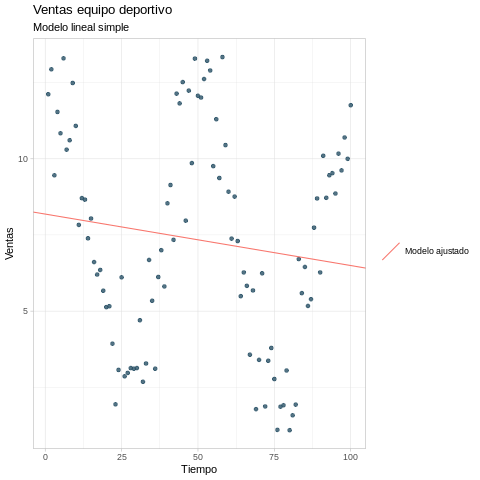

In [8]:
%%R
#gráfica

library(ggplot2)
ggplot(data = df_ventas, aes(X,Y)) +
  geom_point(col="#295065", alpha=0.8) +
  geom_abline(aes(intercept=beta0, slope=beta1, color="Modelo ajustado")) +
  labs(title="Ventas equipo deportivo", subtitle="Modelo lineal simple", x="Tiempo", y="Ventas",  color="")+
  theme_light()  

In [9]:
%%R
lm(Y~X)
#summary(lm(X~Y ))


Call:
lm(formula = Y ~ X)

Coefficients:
(Intercept)            X  
     8.1850      -0.0169  



In [10]:
%%R
x <- 10

## Ejercicio 2

Se sabe que la venta de artículos deportivos tiene una periocidad de 2 años (48 meses) por lo que se propone ajustar un modelo de la siguiente forma $$Y=\beta_0 + \beta_1\sin{\left(\frac{2\pi}{48}X\right)} + \beta_2\cos{\left(\frac{2\pi}{48}X\right)}+\varepsilon$$ Ajuste el modelo por medio de de mínimos cuadrados haciendo uso de la función *nlm()*. Una vez ajustado calcule la suma de los cuadrados.




In [11]:
%%R
#código

sum_error<-function(B){
  b0=B[1]
  b1=B[2]
  b2=B[3]
  return (sum((Y-(b0+b1*sin(((2*pi)/48)*X)+b2*cos(((2*pi)/48)*X)))^2))
}

In [12]:
%%R
nlm(sum_error,c(1,1,1))

$minimum
[1] 183.0311

$estimate
[1] 7.154831 2.068197 4.020562

$gradient
[1] 2.210977e-05 7.335002e-06 2.988104e-06

$code
[1] 1

$iterations
[1] 8



In [13]:
%%R
b = nlm(sum_error,c(1,1,1))$estimate
b0 = b[1]
b1 = b[2]
b2 = b[3]
c(b0,b1,b2)

[1] 7.154831 2.068197 4.020562


In [ ]:
nlm

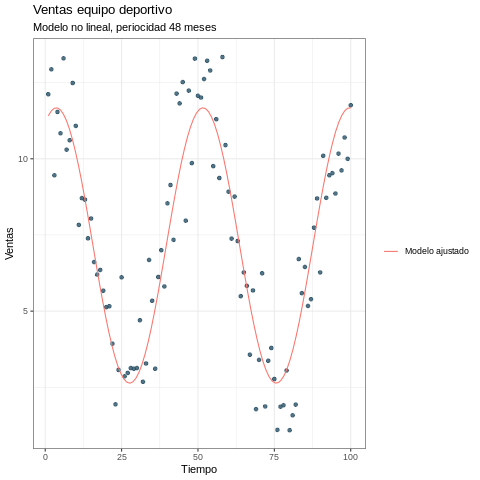

In [14]:
%%R
funcion1 <- function(x) {b0+b1*sin(((2*pi)/48)*x)+b2*cos(((2*pi)/48)*x)}

ggplot(data = df_ventas, aes(X,Y)) +
  geom_point(col="#295065", alpha=0.8) +
  stat_function(fun = funcion1, mapping = aes(color = "Modelo ajustado")) +
  labs(title="Ventas equipo deportivo", subtitle="Modelo no lineal, periocidad 48 meses ", x="Tiempo", y="Ventas",  color="")+
  theme_bw()

## Ejercicio 3

Suponga ahora que no sabemos la periocidad de los datos exactamente, solo sabemos que es aproximadamente cada 48 meses, ajuste el modelo 'no' lineal haciendo uso de la función *nlm()*: $$Y=\beta_0 + \beta_1\sin{\left(\frac{2\pi}{\beta_3}X\right)} + \beta_2\cos{\left(\frac{2\pi}{\beta_4}X\right)}+\varepsilon$$ Una vez ajustado calcule la suma  de los cuadrados de los errores y compare los tres modelos. (Hint: Comienze la búsqueda  de los parámetros $\beta_3, \beta_4$ con el valor inicial de 40).

In [15]:
%%R
#código

sum_error2<-function(B){
  b_0=B[1]
  b_1=B[2]
  b_2=B[3]
  b_3=B[4]
  b_4=B[5]
  return (sum((Y-(b_0+b_1+sin(((2*pi)/b_3)*X)+2*cos(((2*pi)/b_4)*X)))^2))
} 

In [16]:
%%R
nlm(sum_error2, c(7.1,2,4,40,40))

$minimum
[1] 336.6695

$estimate
[1]  6.179186  1.079313  4.000000 42.445935 50.996351

$gradient
[1] -3.966961e-06 -3.966827e-06  0.000000e+00 -5.711603e-07 -1.397361e-06

$code
[1] 1

$iterations
[1] 13



In [17]:
%%R
nlm(sum_error2, c(1,1,1,48,48))

$minimum
[1] 336.6695

$estimate
[1]  3.629248  3.629248  1.000000 42.445924 50.996327

$gradient
[1]  2.349389e-07  2.349389e-07  0.000000e+00  3.481910e-08 -3.391902e-06

$code
[1] 1

$iterations
[1] 13



In [18]:
%%R
c = nlm(sum_error2, c(1,1,1,40,40))$estimate
b_0=c[1]
b_1=c[2]
b_2=c[3]
b_3=c[4]
b_4=c[5]

c(b_0,b_1,b_2,b_3,b_4)

[1]  3.629248  3.629248  1.000000 42.445924 50.996327


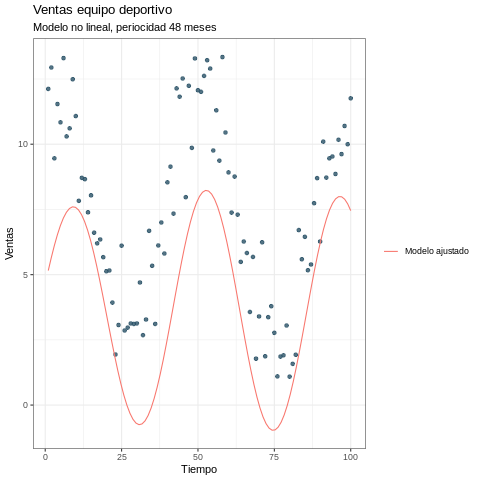

In [19]:
%%R
funcion1 <- function(x) {b_0+b_1*sin(((2*pi)/b_3)*x)+b_2*cos(((2*pi)/b_4)*x)}

ggplot(data = df_ventas, aes(X,Y)) +
  geom_point(col="#295065", alpha=0.8) +
  stat_function(fun = funcion1, mapping = aes(color = "Modelo ajustado")) +
  labs(title="Ventas equipo deportivo", subtitle="Modelo no lineal, periodicidad desconocida", x="Tiempo", y="Ventas",  color="")+
  theme_bw()

##  Ejercicio 4

In [20]:
%%R
#código


NULL


De los tres modelos cuál eligiría y cuál sería su pronóstico de venta el siguiente mes.

## Se tiene el modelo de regresión lineal simple
$y=\beta_0 + \beta_1 x + \varepsilon$, con $\mathbb{E}[\varepsilon]=0$, Var$(\varepsilon)=\sigma^2$ y tal que Cov$(\varepsilon_i, \varepsilon_j)=0$, con $i\not=j$. Demostrar que 

$$\sum_{i=1}^n{y_i}=\sum_{i=1^n}{\hat{y_i}}$$

$$\sum_{i=1}^n{x_ie_i}=0=\sum_{i=1}^n\hat{y}_ie_i$$

$$Cov(\hat{\beta}_0,\hat{\beta_1})=\frac{-\bar{x}\sigma^2}{S_{xx}} $$

$$Cov(\bar{y},\hat{\beta}_1)=0$$

$$\sum_{i=1}^{n} (\hat{y_i} - \bar{y})^2=\hat{\beta}_1^2S_{xx}$$

$$\mathbb{E}\left[\sum_{i=1}^n(\hat{y}_i-\bar{y})^2 \right]=\sigma^2 + \beta_1^2S_{xx}$$

Donde $\hat{y_i}=\hat{\beta}_0+\hat{\beta}_1x_i$ y $e_i$ es el residual i, es decir $e_i=y_i-\hat{y_i}$